# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers

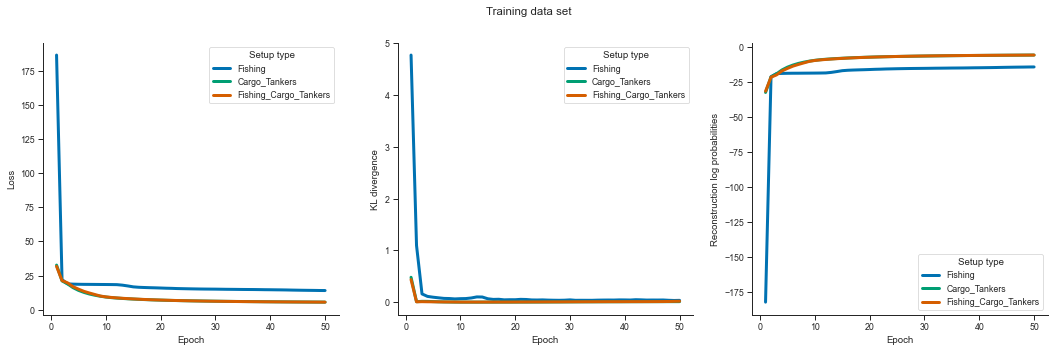

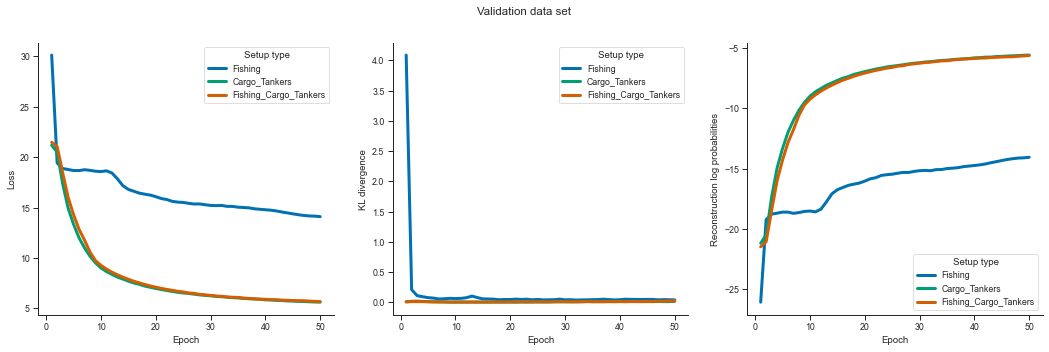

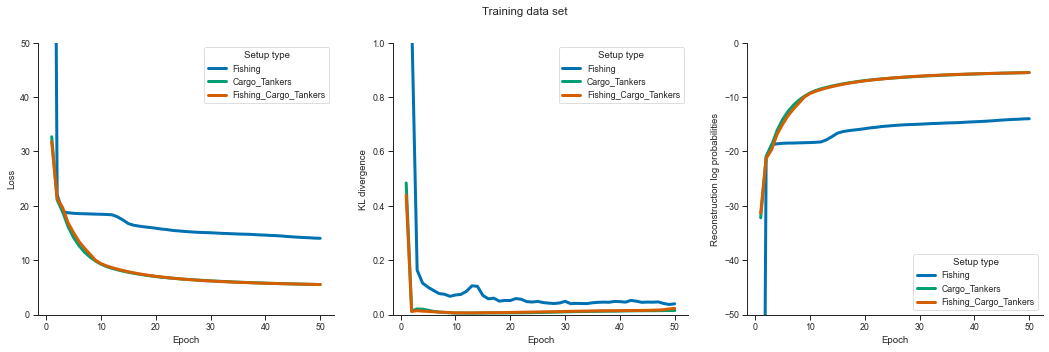

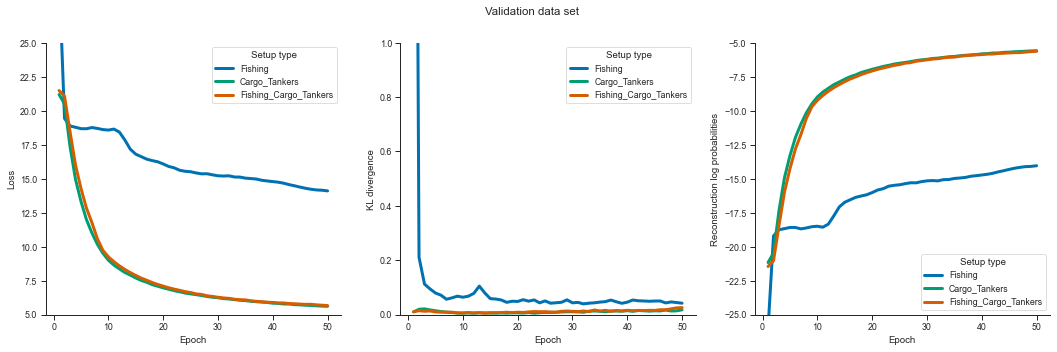

In [2]:
# Use the SummaryModels class
summary_models = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600")
df_default_fish = summary_models.load_curves_df("Fishing")
summary_models = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600")
df_default_carg_tank = summary_models.load_curves_df("Cargo_Tankers")
summary_models = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600")
df_default_fish_carg_tank = summary_models.load_curves_df("Fishing_Cargo_Tankers")

# Combine the different vessel type date frames 
df = pd.concat([df_default_fish, df_default_carg_tank, df_default_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]

# Plot the learning curves
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                           ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                           ylims=[(5, 25), (0, 1), (-25, -5)])

# Annealed Kullback–Leibler 

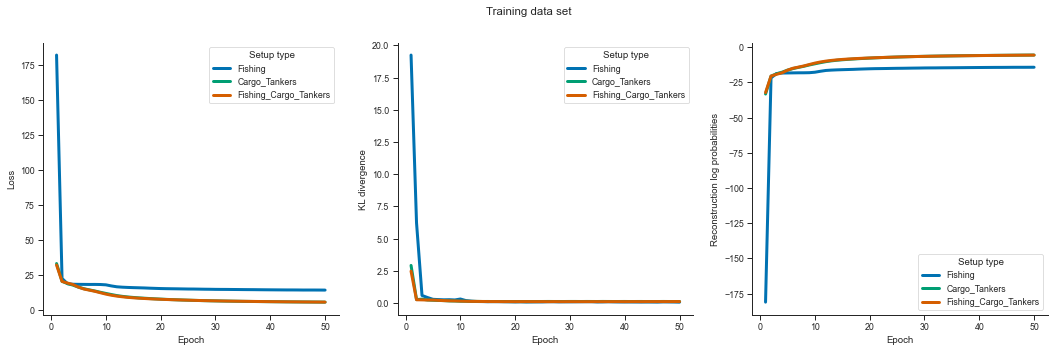

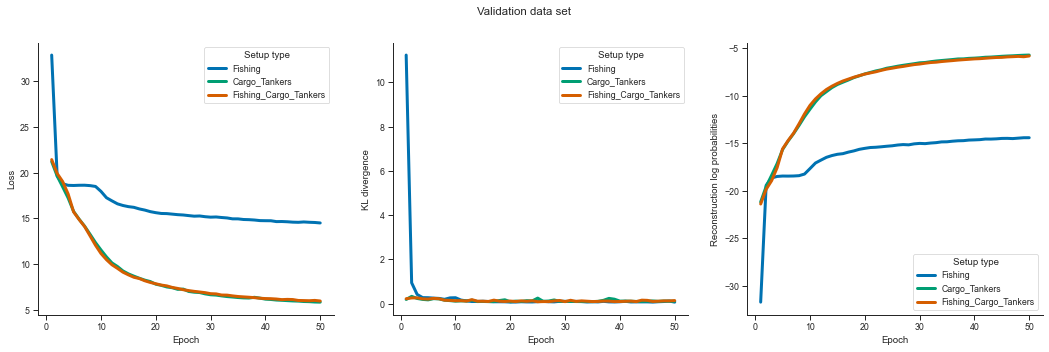

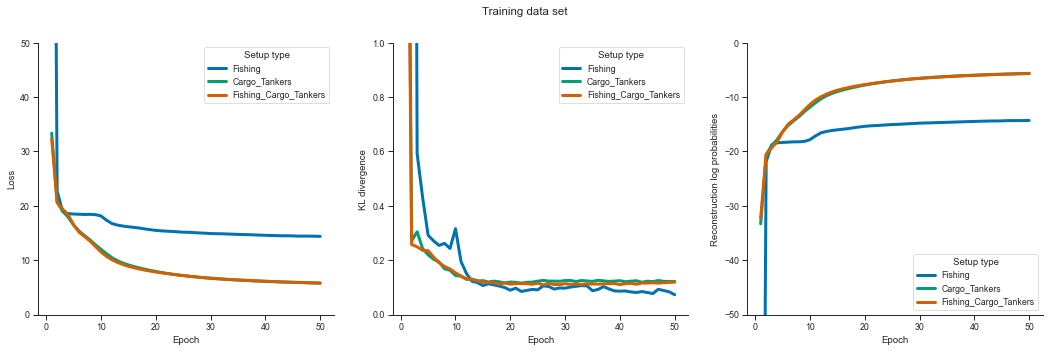

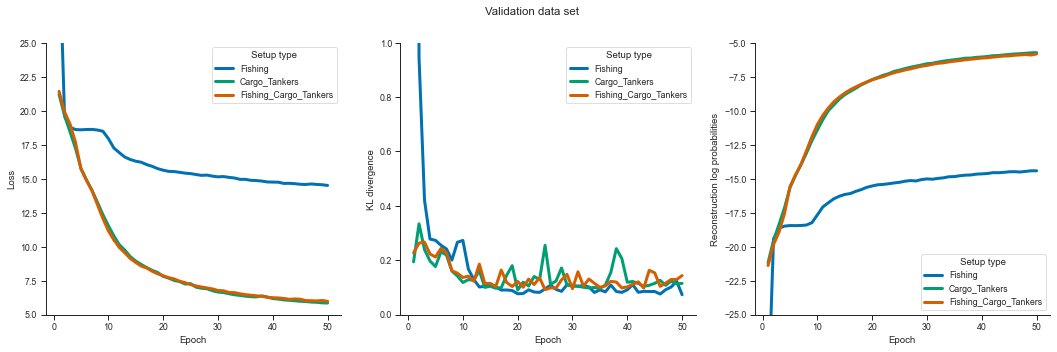

In [3]:
# Use the SummaryModels class
summary_models = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", kl_annealing=True)
df_annealing_fish = summary_models.load_curves_df("Fishing")
summary_models = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", kl_annealing=True)
df_annealing_carg_tank = summary_models.load_curves_df("Cargo_Tankers")
summary_models = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600", kl_annealing=True)
df_annealing_fish_carg_tank = summary_models.load_curves_df("Fishing_Cargo_Tankers")

# Combine the different vessel type date frames 
df = pd.concat([df_annealing_fish, df_annealing_carg_tank, df_annealing_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]

# Plot the learning curves
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                           ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                           ylims=[(5, 25), (0, 1), (-25, -5)])